In [2]:
#load the data files

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.spatial import cKDTree
import numpy as np

In [5]:

# Specify the path to your CSV files
combined_csv_path = "/Users/computer/Downloads/Load/Load/data/combined/*.csv"

# Get all CSV file paths
combined_csv_files = glob.glob(combined_csv_path)

# Read and combine all files into one DataFrame
combined_df = [pd.read_csv(file, parse_dates=['date_time']) for file in combined_csv_files ]

# Merge dataframes of all processed files
combined_df = pd.concat(combined_df, ignore_index=True)

# Display the combined DataFrame
print(combined_df)



         Unnamed: 0  Unnamed: 0_power  id_power             name_power  \
0                 0           2705038        25        Shedia (SHEDIA)   
1                 1           2705039        25        Shedia (SHEDIA)   
2                 2           2705040        25        Shedia (SHEDIA)   
3                 3           2705041        25        Shedia (SHEDIA)   
4                 4           2705042        25        Shedia (SHEDIA)   
...             ...               ...       ...                    ...   
3810235     3810235           2286139        21  Ishtafina (ISHTAFINA)   
3810236     3810236           2286140        21  Ishtafina (ISHTAFINA)   
3810237     3810237           2286141        21  Ishtafina (ISHTAFINA)   
3810238     3810238           2286142        21  Ishtafina (ISHTAFINA)   
3810239     3810239           2286143        21  Ishtafina (ISHTAFINA)   

                 x          y     id.1           date_time      power  \
0        36.134983  29.930689  2032129

In [5]:
## check the lon and x coordinate differances

In [6]:
# Check if 'lon' and 'x' columns exist
if 'lon' in combined_df.columns and 'x' in combined_df.columns:
    # Compare the values (e.g., check if they're equal)
    combined_df['lon_x_equal'] = combined_df['lon'] == combined_df['x']
    
    # Compute the difference between 'lon' and 'x'
    combined_df['lon_x_difference'] = combined_df['lon'] - combined_df['x']
    
    # Display a sample of the comparison
    print(combined_df[['lon', 'x', 'lon_x_equal', 'lon_x_difference']].head())
else:
    print("The required columns 'lon' and 'x' are not in the DataFrame.")


         lon          x  lon_x_equal  lon_x_difference
0  36.135555  36.134983        False          0.000572
1  36.135555  36.134983        False          0.000572
2  36.135555  36.134983        False          0.000572
3  36.135555  36.134983        False          0.000572
4  36.135555  36.134983        False          0.000572


In [7]:
## find the distance between the stations using  Haversine formula

In [8]:

import math
import pandas as pd

# Function to calculate distance between two coordinates using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers (default)
    R = 6371.0  # Radius in kilometers
    
    # Convert degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in kilometers
    distance_km = R * c
    return distance_km

# Apply the haversine function to compute distances
combined_df['distance_km'] = combined_df.apply(
    lambda row: haversine(row['lat'], row['lon'], row['y'], row['x']), axis=1)

# View the results with distance in kilometers
print(combined_df[['lat', 'lon', 'y', 'x', 'distance_km']])

# Find the maximum distance
max_distance = combined_df['distance_km'].max()
print("\nMaximum Distance between Coordinates (km):", max_distance)


               lat        lon          y          x  distance_km
0        30.342222  36.135555  29.930689  36.134983    45.760415
1        30.342222  36.135555  29.930689  36.134983    45.760415
2        30.342222  36.135555  29.930689  36.134983    45.760415
3        30.342222  36.135555  29.930689  36.134983    45.760415
4        30.342222  36.135555  29.930689  36.134983    45.760415
...            ...        ...        ...        ...          ...
3810235  32.380280  35.811670  32.358704  35.777637     3.996499
3810236  32.380280  35.811670  32.358704  35.777637     3.996499
3810237  32.380280  35.811670  32.358704  35.777637     3.996499
3810238  32.380280  35.811670  32.358704  35.777637     3.996499
3810239  32.380280  35.811670  32.358704  35.777637     3.996499

[3810240 rows x 5 columns]

Maximum Distance between Coordinates (km): 80.6070091187136


In [9]:
## missing values and missing percentage

In [10]:
import pandas as pd

missing_values = combined_df.isnull().sum()  # Count missing values for each column
total_values = len(combined_df)  # Total number of rows
missing_percentage = (missing_values / total_values) * 100  # Calculate percentage of missing values

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Column Name': combined_df.columns,
    'Missing Values Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Display the results
print(missing_info)


                                         Column Name  Missing Values Count  \
Unnamed: 0                                Unnamed: 0                     0   
Unnamed: 0_power                    Unnamed: 0_power                     0   
id_power                                    id_power                     0   
name_power                                name_power                     0   
x                                                  x                     0   
y                                                  y                     0   
id.1                                            id.1                     0   
date_time                                  date_time                     0   
power                                          power                     0   
location_id                              location_id                     0   
weather_station_id                weather_station_id                     0   
Unnamed: 0.1                            Unnamed: 0.1            

In [11]:
### mising value non-zero percentage

In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_df.isnull().mean() * 100

# Get the columns with missing values and their percentages
missing_columns_with_percentage = missing_percentage[missing_percentage > 0]

# Convert to a DataFrame for better display
missing_columns_df = missing_columns_with_percentage.reset_index()
missing_columns_df.columns = ['Column Name', 'Missing Percentage']

print(missing_columns_df)


                 Column Name  Missing Percentage
0         Unnamed: 0_weather            9.323848
1            wind_speed_knot           10.206391
2      wind_direction_degree           10.206391
3                 irradiance           10.206549
4  relative_humidity_percent           10.206391
5          air_temperature_c           10.207493
6                rainfall_mm           10.206391


# Feature selection 

## using correlation 

In [15]:
# Identify redundant features (highly correlated pairs)


numeric_df = combined_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

threshold = 0.8
highly_correlated_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns 
                           if i != j and abs(correlation_matrix[i][j]) > threshold]

print("Highly correlated pairs (|correlation| > 0.8):")
for pair in highly_correlated_pairs:
    print(pair)


Highly correlated pairs (|correlation| > 0.8):
('id_power', 'id.1')
('id_power', 'location_id')
('x', 'lon')
('y', 'lat')
('id.1', 'id_power')
('id.1', 'location_id')
('location_id', 'id_power')
('location_id', 'id.1')
('weather_station_id', 'Unnamed: 0.1')
('weather_station_id', 'id_weather')
('Unnamed: 0.1', 'weather_station_id')
('Unnamed: 0.1', 'id_weather')
('id_weather', 'weather_station_id')
('id_weather', 'Unnamed: 0.1')
('lon', 'x')
('lat', 'y')
('irradiance', 'irradiance_corrected')
('irradiance_corrected', 'irradiance')


### correlation heatmap

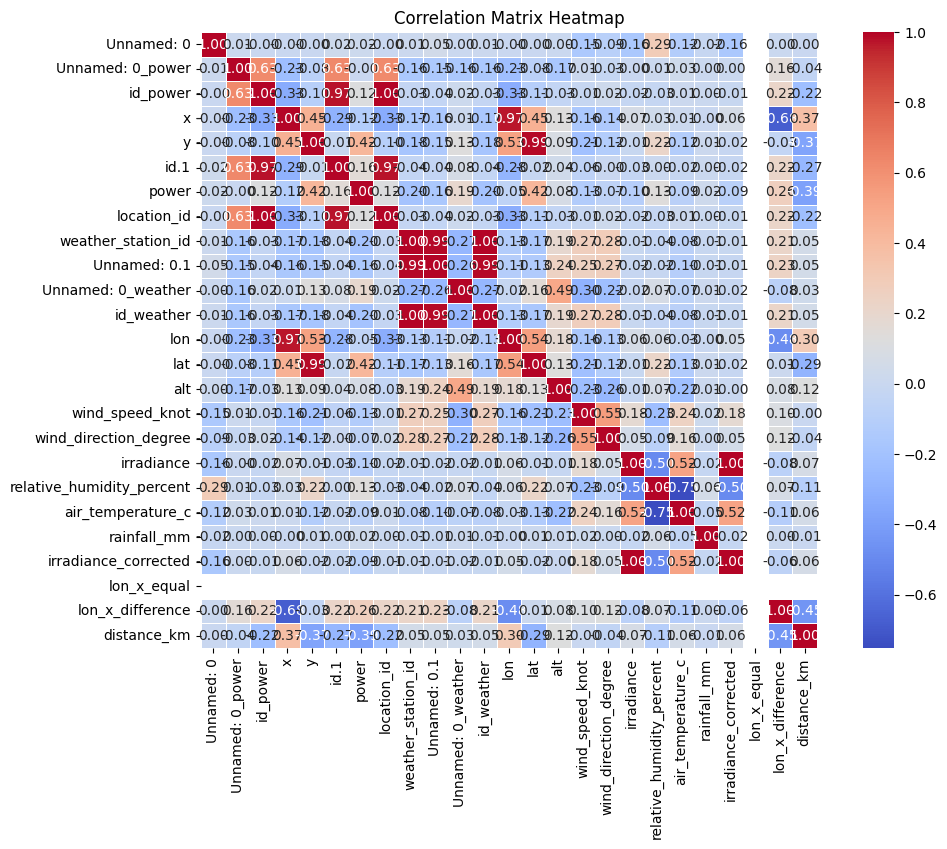

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = combined_df.corr(numeric_only=True)  # Ensure only numerical data is used

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


## Select Top N Features

In [19]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Select only numerical features to avoid encoding overhead
numerical_cols = combined_df.select_dtypes(include=['number']).columns.tolist()

# Define features and target variable
X = combined_df[numerical_cols].drop(columns=['power'], errors='ignore')
y = combined_df['power']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model with fewer trees and depth limit
model = RandomForestRegressor(n_estimators=30, max_depth=8, random_state=42, n_jobs=-1)

# Use RFE for feature selection with a larger step
selector = RFE(model, n_features_to_select=5, step=5)  # Increased step for speed

# Fit the selector on training data
selector.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[selector.support_]

# Print selected features
print(f"\nTop 5 Selected Features: {selected_features.tolist()}")




Top 5 Selected Features: ['Unnamed: 0_power', 'x', 'y', 'id.1', 'lon_x_difference']


In [20]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Train model
model = RandomForestRegressor(n_estimators=30, max_depth=8, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Select top 5 features
top_features = feature_importances.nlargest(5).index.tolist()

print(f"\nTop 5 Selected Features: {top_features}")



Top 5 Selected Features: ['y', 'x', 'lon_x_difference', 'Unnamed: 0_power', 'id.1']


### Lasso Regression for Feature Selection


Selected Features using Lasso: ['Unnamed: 0', 'Unnamed: 0_power', 'id_power', 'x', 'y', 'id.1', 'location_id', 'weather_station_id', 'Unnamed: 0.1', 'Unnamed: 0_weather', 'id_weather', 'lat', 'alt', 'wind_speed_knot', 'wind_direction_degree', 'irradiance', 'relative_humidity_percent', 'air_temperature_c', 'irradiance_corrected', 'distance_km']


/var/folders/np/t7_6mjq16kn5ymsvjbw3kjd40000gn/T/ipykernel_23668/2772042345.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Coefficient'], y=feature_importance['Feature'],


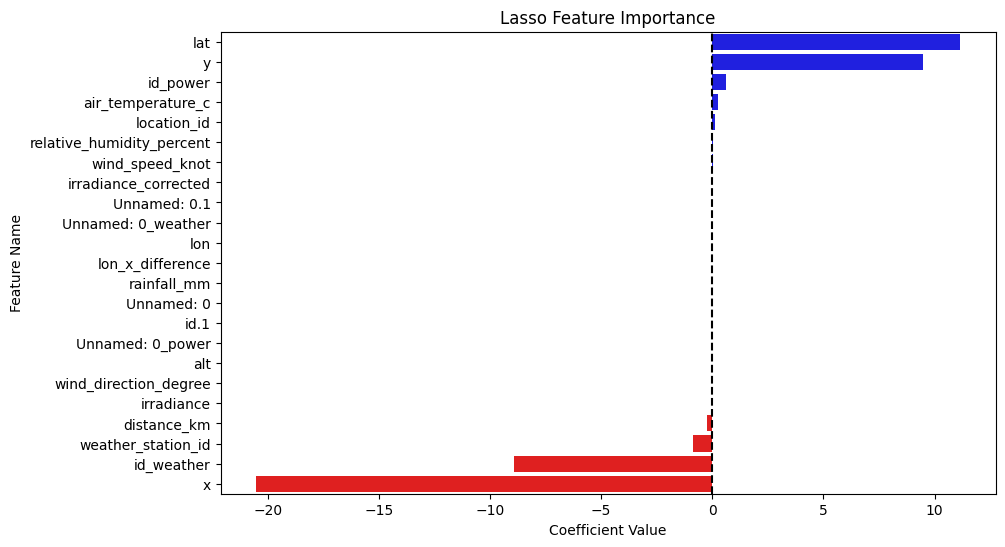

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer  # For imputation

# Step 1: Ensure Features are Numerical
X = combined_df.select_dtypes(include=[np.number])  
y = combined_df['power']

# Remove target variable if mistakenly included
X = X.drop(columns=['power'], errors='ignore')

# Step 2: Handle missing values by imputation (mean imputation)
imputer = SimpleImputer(strategy='mean')  # Can change to 'median' if preferred
X_imputed = imputer.fit_transform(X)

# Step 3: Apply Lasso Regression for Feature Selection
lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=5000)
lasso.fit(X_imputed, y)

# Get selected features (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Print selected features
print("\nSelected Features using Lasso:", selected_features.tolist())

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Step 4: Visualize Feature Importance
plt.figure(figsize=(10, 6))
colors = ['red' if coef < 0 else 'blue' for coef in feature_importance['Coefficient']]

sns.barplot(x=feature_importance['Coefficient'], y=feature_importance['Feature'], 
            palette=colors, legend=False)

plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Lasso Feature Importance')
plt.axvline(x=0, color='black', linestyle='--')  # Separating positive & negative impact
plt.show()


# Feature Importance from Tree-Based Models


## Random Forst Model

In [25]:
print(combined_df.columns)


Index(['Unnamed: 0', 'Unnamed: 0_power', 'id_power', 'name_power', 'x', 'y',
       'id.1', 'date_time', 'power', 'location_id', 'weather_station_id',
       'Unnamed: 0.1', 'date_time_weather', 'Unnamed: 0_weather', 'id_weather',
       'name_weather', 'lon', 'lat', 'alt', 'wind_speed_knot',
       'wind_direction_degree', 'irradiance', 'relative_humidity_percent',
       'air_temperature_c', 'rainfall_mm', 'irradiance_corrected',
       'lon_x_equal', 'lon_x_difference', 'distance_km'],
      dtype='object')


## Prepare the data

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Drop rows with missing values for the relevant columns
combined_df = combined_df.dropna(subset=['x', 'y', 'lon', 'lat','power'])  # Assuming 'power' is the target

# Extract features (coordinates) and target (power)
features = combined_df[['x', 'y', 'lon', 'lat','rainfall_mm']]
target = combined_df['power']

# Extract time-based features
combined_df['hour'] = combined_df['date_time'].dt.hour
combined_df['day'] = combined_df['date_time'].dt.dayofweek
combined_df['month'] = combined_df['date_time'].dt.month

# Update the features with time-based data
features = combined_df[['x', 'y', 'lon', 'lat', 'hour', 'day', 'month']]


### Split the data

In [29]:
features = combined_df[['x', 'y', 'lon', 'lat', 'hour', 'day', 'month']]

# Check correlation with target
print(combined_df[['power', 'rainfall_mm']].corr())


                power  rainfall_mm
power        1.000000     0.023488
rainfall_mm  0.023488     1.000000


### Train the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Square root of MSE to get RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² (R-squared): {r2}")


### improving the model

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ensure no missing values in relevant columns
combined_df = combined_df.dropna(subset=['x', 'y', 'lon', 'lat', 'rainfall_mm', 'power'])

# Convert 'date_time' column to datetime format if not already
combined_df['date_time'] = pd.to_datetime(combined_df['date_time'])

# Extract time-based features
combined_df['hour'] = combined_df['date_time'].dt.hour
combined_df['day'] = combined_df['date_time'].dt.dayofweek
combined_df['month'] = combined_df['date_time'].dt.month

# Define features and target
features = combined_df[['x', 'y', 'lon', 'lat', 'hour', 'day', 'month', 'rainfall_mm']]
target = combined_df['power']

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define hyperparameter grid (smaller for RandomizedSearchCV)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform Hyperparameter Tuning using RandomizedSearchCV (faster than GridSearchCV)
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_grid,
                                   n_iter=20, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² (R-squared): {r2:.4f}")

# Feature Importance Analysis
feature_importances = best_model.feature_importances_
feature_names = ['x', 'y', 'lon', 'lat', 'hour', 'day', 'month']

# Plot Feature Importances
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


# Train the Random Forest model

In [ ]:
# Create a time range for the next 7 days with 15-minute intervals 
future_time_range = pd.date_range(start=pd.Timestamp('2025-03-10'), periods=96*7, freq='15T')  # 96 15-minute intervals per day for 7 days

# Generate a DataFrame for the future time range
future_df = pd.DataFrame({
    'date_time': future_time_range,
    'x': [your_x_value] * len(future_time_range),  # Replace 'your_x_value' with the actual x value for all rows
    'y': [your_y_value] * len(future_time_range),  # Replace 'your_y_value' with the actual y value for all rows
    'lon': [your_lon_value] * len(future_time_range),  # Replace 'your_lon_value' with the actual lon value for all rows
    'lat': [your_lat_value] * len(future_time_range),  # Replace 'your_lat_value' with the actual lat value for all rows
})

# Add time-based features to the future dataframe
future_df['hour'] = future_df['date_time'].dt.hour
future_df['day'] = future_df['date_time'].dt.dayofweek
future_df['month'] = future_df['date_time'].dt.month

# Extract features for the future data
future_features = future_df[['x', 'y', 'lon', 'lat', 'hour', 'day', 'month']]

# Predict the consumption for the next 7 days
future_predictions = model.predict(future_features)

# Display the predicted values
future_df['predicted_power'] = future_predictions
print(future_df[['date_time', 'predicted_power']])


# Model to predict

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

# Prepare the dataset
# Let's assume `consumption_df` contains the historical data with `x`, `y`, `lon`, `lat`, and `consumption`

# Extract relevant features and target
features = consumption_df[['x', 'y', 'lon', 'lat']]  # Coordinate features
target = consumption_df['consumption']  # Consumption is the target variable

# Time-based features (optional)
consumption_df['hour'] = consumption_df['date_time'].dt.hour
consumption_df['day'] = consumption_df['date_time'].dt.dayofweek
consumption_df['month'] = consumption_df['date_time'].dt.month
features = consumption_df[['x', 'y', 'lon', 'lat', 'hour', 'day', 'month']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the next consumption values
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# You can now use the model to predict future consumption
# Assuming we have future data with `x`, `y`, `lon`, `lat`, and time-based features
future_data = # Data containing x, y, lon, lat, and time-based features for next 7 days
future_predictions = model.predict(future_data)
print(f"Predicted consumption for the next 7 days: {future_predictions}")
